In [48]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns


# Laboratorio

## 1. K-NN de opiniones.

Para nuestro ejercicio tenemos 257 registros con opiniones de usuarios sobre una app. La columna sentimentValue puede tomar los valores entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo.


Buscamos a traves de un algoritmo de K-NN determinar la cantidad de estrellas que le brindará un usuario dependiendo de los comentarios escritos, esto es debido a que se busca implementar un algoritmo que brinde beneficios cuando determine que va a tener una mala evaluación alguna aplicación.



### Comenzamos revisando los datos

In [49]:
# leer comentarios.csv
df = pd.read_csv('comentarios.csv', sep=';')
df

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
...,...,...,...,...,...,...,...
252,Muy buena aplicacion,Muy buena genial,3,positive,positive,5,2.814818
253,Buena,Genial,1,positive,positive,5,2.924393
254,Wuau,Genial,1,positive,positive,5,2.924393
255,Muy buena,Genial,1,positive,positive,5,2.924393


<AxesSubplot:>

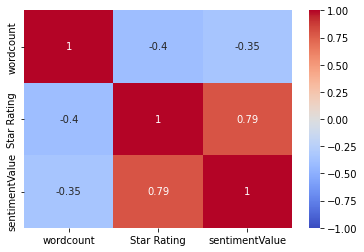

In [50]:
# sns heatmap para ver la correlacion entre las variables
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm')

<AxesSubplot:xlabel='Star Rating', ylabel='sentimentValue'>

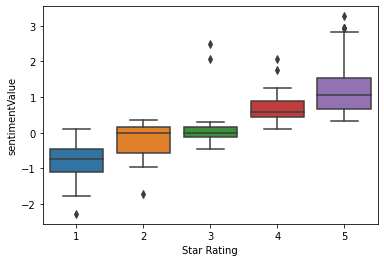

In [51]:
# sns plot
sns.boxplot(x="Star Rating", y="sentimentValue", data=df)

<AxesSubplot:xlabel='wordcount', ylabel='sentimentValue'>

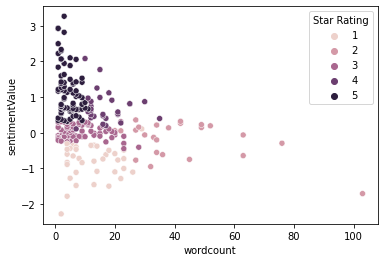

In [52]:
# sns scatter con hue Star Rating
sns.scatterplot(x="wordcount", y="sentimentValue", hue="Star Rating", data=df)

### Entrenamiento del modelo KNN

In [53]:
# ya que se busca predecir las estrellas deberiamos tener k=5
k=5

X, y = df[['sentimentValue', 'wordcount']], df['Star Rating']
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0, train_size = 0.7)

scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)
y_pred

array([5, 2, 5, 3, 2, 1, 2, 5, 1, 5, 5, 5, 1, 3, 1, 4, 5, 3, 3, 2, 5, 5,
       3, 5, 4, 5, 5, 2, 5, 2, 5, 3, 3, 5, 3, 3, 3, 5, 4, 5, 1, 3, 1, 5,
       3, 5, 3, 3, 2, 1, 3, 3, 3, 3, 5, 1, 1, 5, 3, 5, 3, 3, 1, 4, 1, 5,
       2, 1, 5, 3, 3, 5, 1, 5, 2, 3, 5, 5])

### Evaluacion de la certeza

In [54]:
print( "Certeza en datos de entrenamiento: ", metrics.accuracy_score(y_train, knn.predict(Xtrain)))
print( "Certeza en datos de test: ", metrics.accuracy_score(y_test, knn.predict(Xtest)))

Certeza en datos de entrenamiento:  0.9050279329608939
Certeza en datos de test:  0.8461538461538461


# 2. Clasificación de plantas 


Vamos a utilizar el dataset de datos del iris para nuestro ejercicio usando K-NN. El conjunto de datos consta de cuatro atributos: anchura del sépalo, longitud del sépalo, anchura del pétalo y longitud del pétalo. Estos son los atributos de tipos específicos de plantas de iris. La tarea es predecir la clase a la que pertenecen estas plantas. Hay tres clases en el conjunto de datos: Iris-setosa, Iris-versicolor e Iris-virginica.


Nota: Investigar cómo incorporar un .data a python.

In [55]:
# leer iris.data
df_iris = pd.read_csv('iris.data', sep=',', header=None, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
df_iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [56]:
# crear una columna numerica para cada clase
df_iris['class_num'] = df_iris['class'].map({'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3})

# exploracion de los datos

<AxesSubplot:>

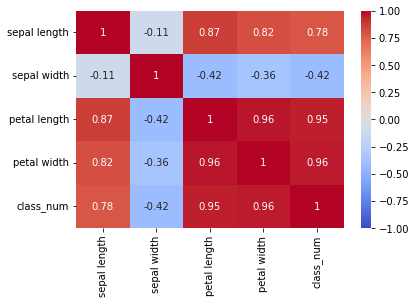

In [57]:
# sns heatmap para ver la correlacion entre las variables
sns.heatmap(df_iris.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm')

Todos los valores tienen una correlación relevante para el target

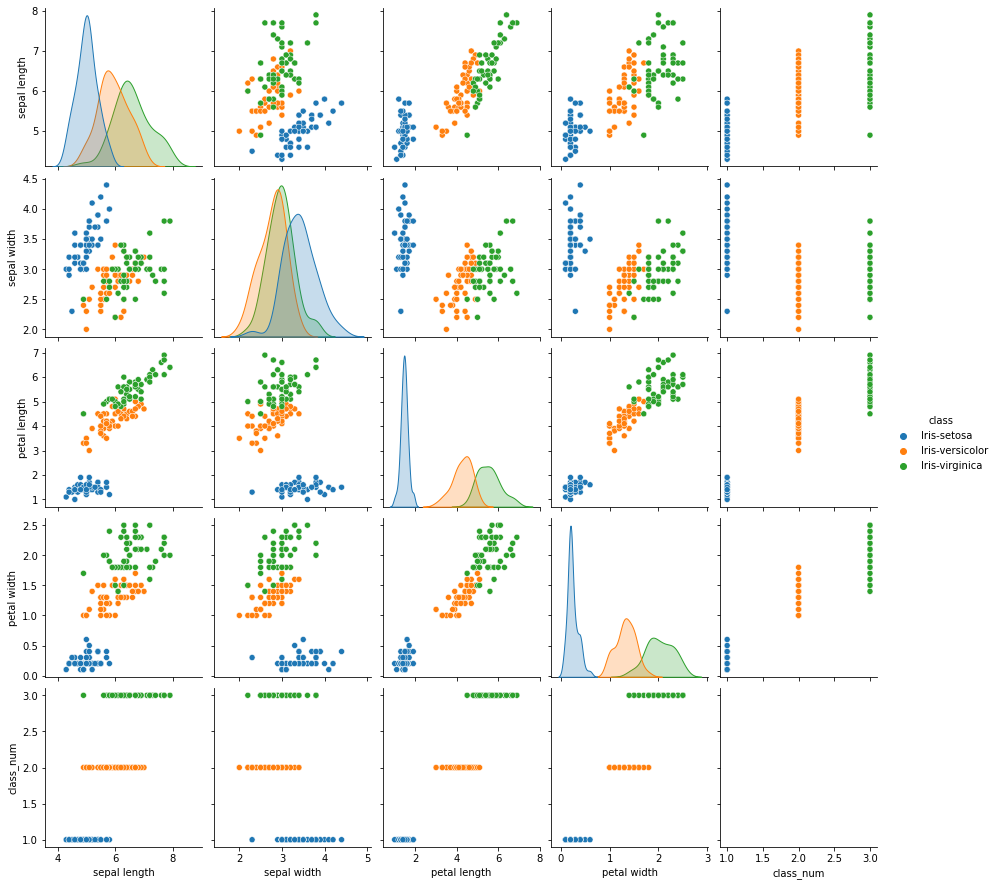

In [58]:
# pairplot
sns.pairplot(df_iris, hue='class')

Todas las variables excepto sepal width tienen una correlacion alta con la clase

## Modelo

In [59]:
# entrenaremos usando solo petal length, petal width y sepal lenght, sepal width no nos da suficiente información
X, y = df_iris[['petal length', 'petal width', 'sepal length']], df_iris[['class']]
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, stratify = y, random_state=10, train_size = 0.6)

scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

# debemos usar 3 ya que solo existen 3 clases
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)

# mostrar las metricas
print( "Certeza en datos de entrenamiento: ", metrics.accuracy_score(y_train, knn.predict(Xtrain)))
print( "Certeza en datos de test: ", metrics.accuracy_score(y_test, knn.predict(Xtest)))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

Certeza en datos de entrenamiento:  0.9444444444444444
Certeza en datos de test:  1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      1.00      1.00        20
 Iris-virginica       1.00      1.00      1.00        20

       accuracy                           1.00        60
      macro avg       1.00      1.00      1.00        60
   weighted avg       1.00      1.00      1.00        60

[[20  0  0]
 [ 0 20  0]
 [ 0  0 20]]


/home/dennis/.cache/pypoetry/virtualenvs/pythondata-ElkPyzMM-py3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


El modelo obtuvo una certeza de 1.0, quiza está sobreentrenado, pero los datos correlacionan fuertemente y no hay tantas muestras, es posible que no se pueda mejorar el modelo.

#  3. Diabetes

En el GES existe un dataset llamado “diabetes.csv”, para este ejercicio debe de realizar un modelo que pueda predecir si una persona tendrá diabetes o no usando el algoritmo K-NN.

In [60]:
# leer diabetes.csv
df_diabetes = pd.read_csv('diabetes.csv')
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:>

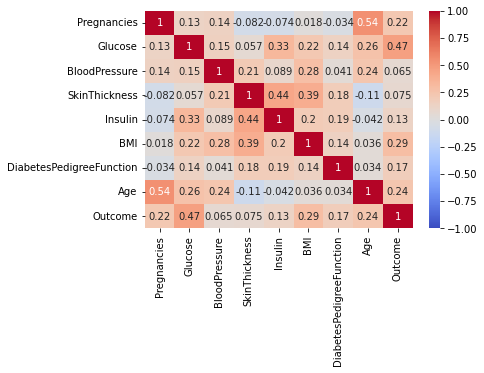

In [61]:
# sns heatmap para ver la correlacion entre las variables
sns.heatmap(df_diabetes.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm')


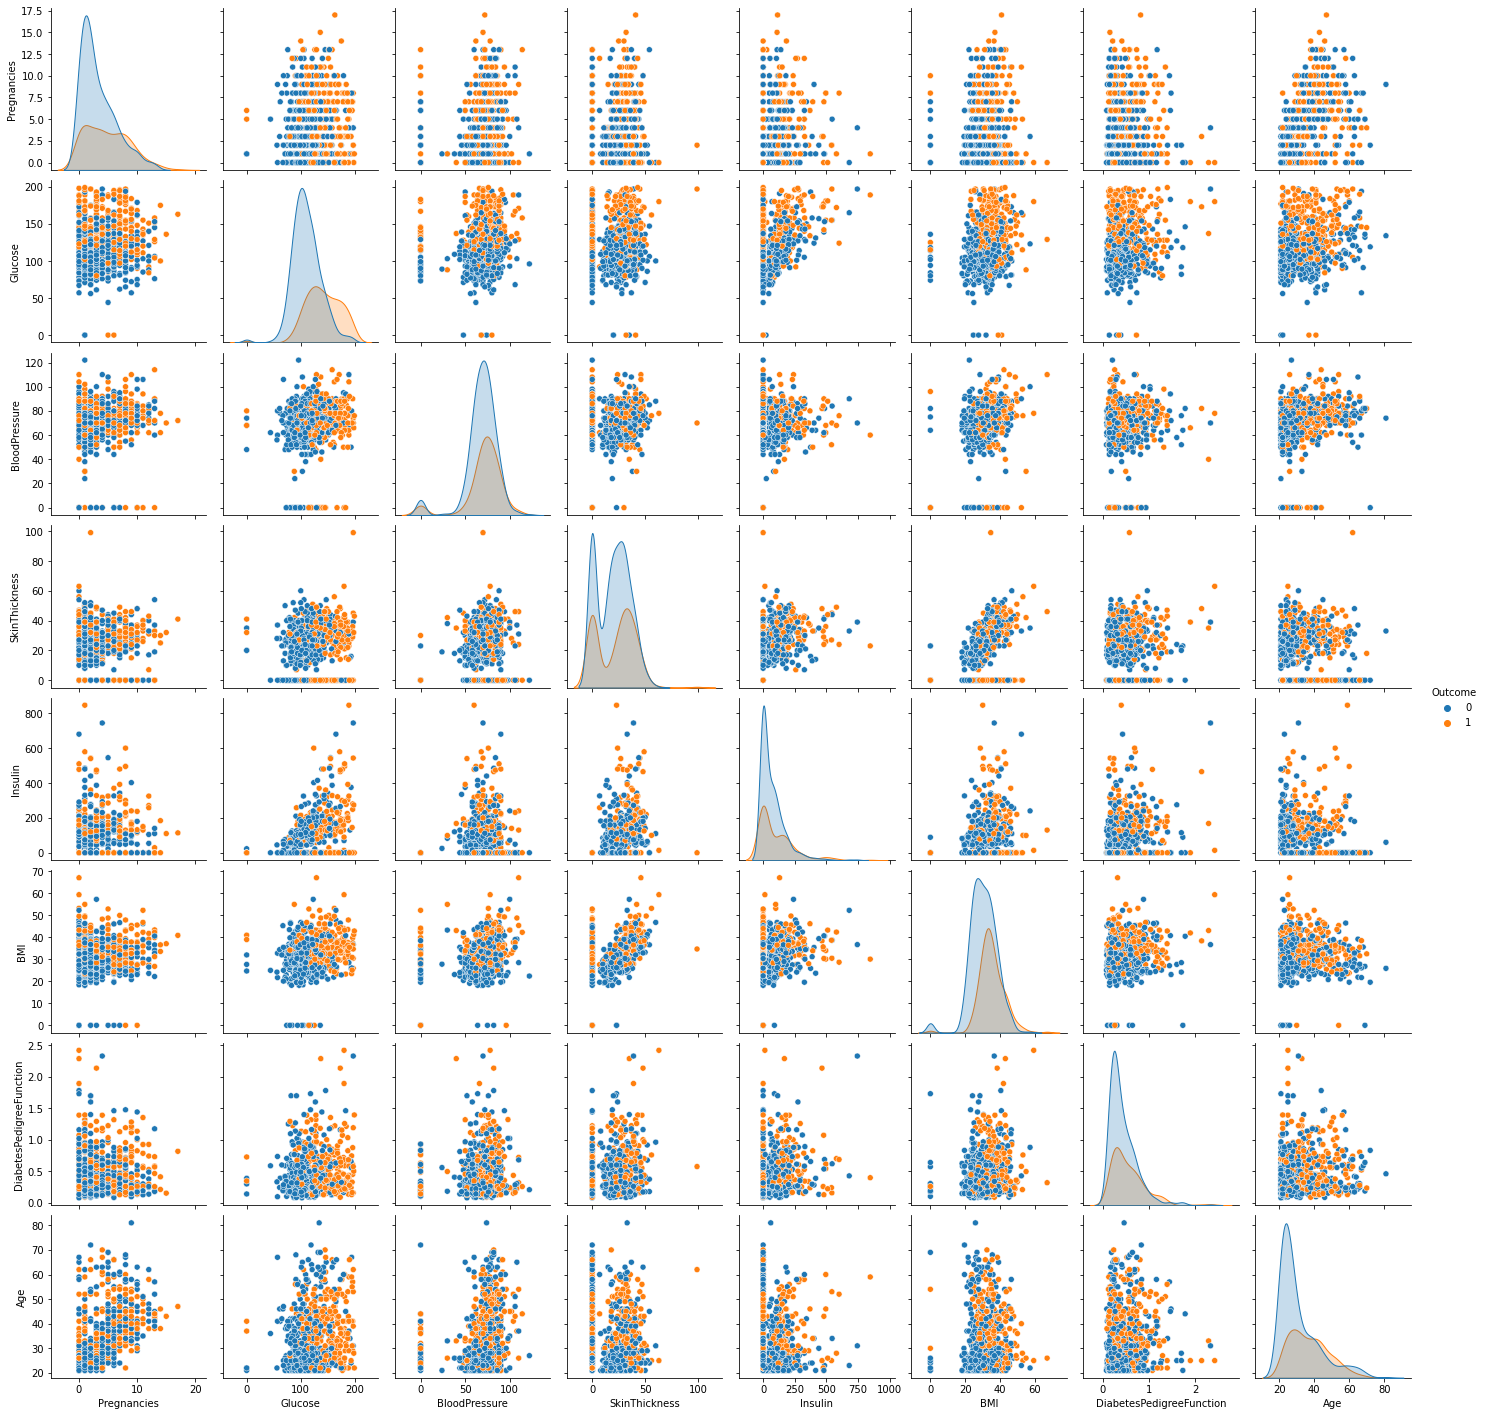

In [62]:
# pairplot
sns.pairplot(df_diabetes, hue='Outcome')

No existe una relacion tan marcada entre los parametros, los mas valiosos son glucosa, bmi y edad.

## Modelo

In [63]:
# entrenamos el modelo
X, y = df_diabetes[['BMI', 'Glucose', 'Age', 'Pregnancies', 'BloodPressure', 'DiabetesPedigreeFunction']], df_diabetes[['Outcome']]
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42, train_size = 0.7)

scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)

# mostrar las metricas
print( "Certeza en datos de entrenamiento: ", metrics.accuracy_score(y_train, knn.predict(Xtrain)))
print( "Certeza en datos de test: ", metrics.accuracy_score(y_test, knn.predict(Xtest)))
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

Certeza en datos de entrenamiento:  0.8417132216014898
Certeza en datos de test:  0.7229437229437229
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       150
           1       0.72      0.35      0.47        81

    accuracy                           0.72       231
   macro avg       0.72      0.64      0.64       231
weighted avg       0.72      0.72      0.69       231

[[139  11]
 [ 53  28]]


/home/dennis/.cache/pypoetry/virtualenvs/pythondata-ElkPyzMM-py3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## 4. K-NN y matriz de confusión


En el Ges existe un dataset llamada bmd.csv, usando el algoritmo K-NN, determine el mejor “k” y las mejores variables para clasificar “FRACTURE” y calcular la matriz de confusión.

In [64]:
# leer bmd.csv
df_bmd = pd.read_csv('bmd.csv')
print(df_bmd.isna().sum())
df_bmd


id              0
age             0
sex             0
fracture        0
weight_kg       0
height_cm       0
medication      0
waiting_time    0
bmd             0
dtype: int64


,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909
...,...,...,...,...,...,...,...,...,...
164,21892,77.982543,M,fracture,74.0,164.0,No medication,49,0.7941
165,24140,50.285303,F,fracture,59.0,161.0,No medication,6,0.7971
166,6969,46.359721,M,fracture,67.0,169.0,No medication,10,0.8037
167,5505,54.788368,M,fracture,70.0,166.0,No medication,14,0.8072


Es posible que las variables categoricas sean útiles, las encodeamos como numeros:

In [81]:
# convertir variables categoricas a numericas

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_bmd['sex_encoded'] = le.fit_transform(df_bmd['sex'])
df_bmd['medication_encoded'] = le.fit_transform(df_bmd['medication'])
df_bmd['fracture_encoded'] = le.fit_transform(df_bmd['fracture'])
df_bmd

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd,sex_encoded,medication_encoded,fracture_encoded
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793,0,0,1
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946,0,2,1
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067,1,2,1
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112,0,2,1
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
164,21892,77.982543,M,fracture,74.0,164.0,No medication,49,0.7941,1,2,0
165,24140,50.285303,F,fracture,59.0,161.0,No medication,6,0.7971,0,2,0
166,6969,46.359721,M,fracture,67.0,169.0,No medication,10,0.8037,1,2,0
167,5505,54.788368,M,fracture,70.0,166.0,No medication,14,0.8072,1,2,0


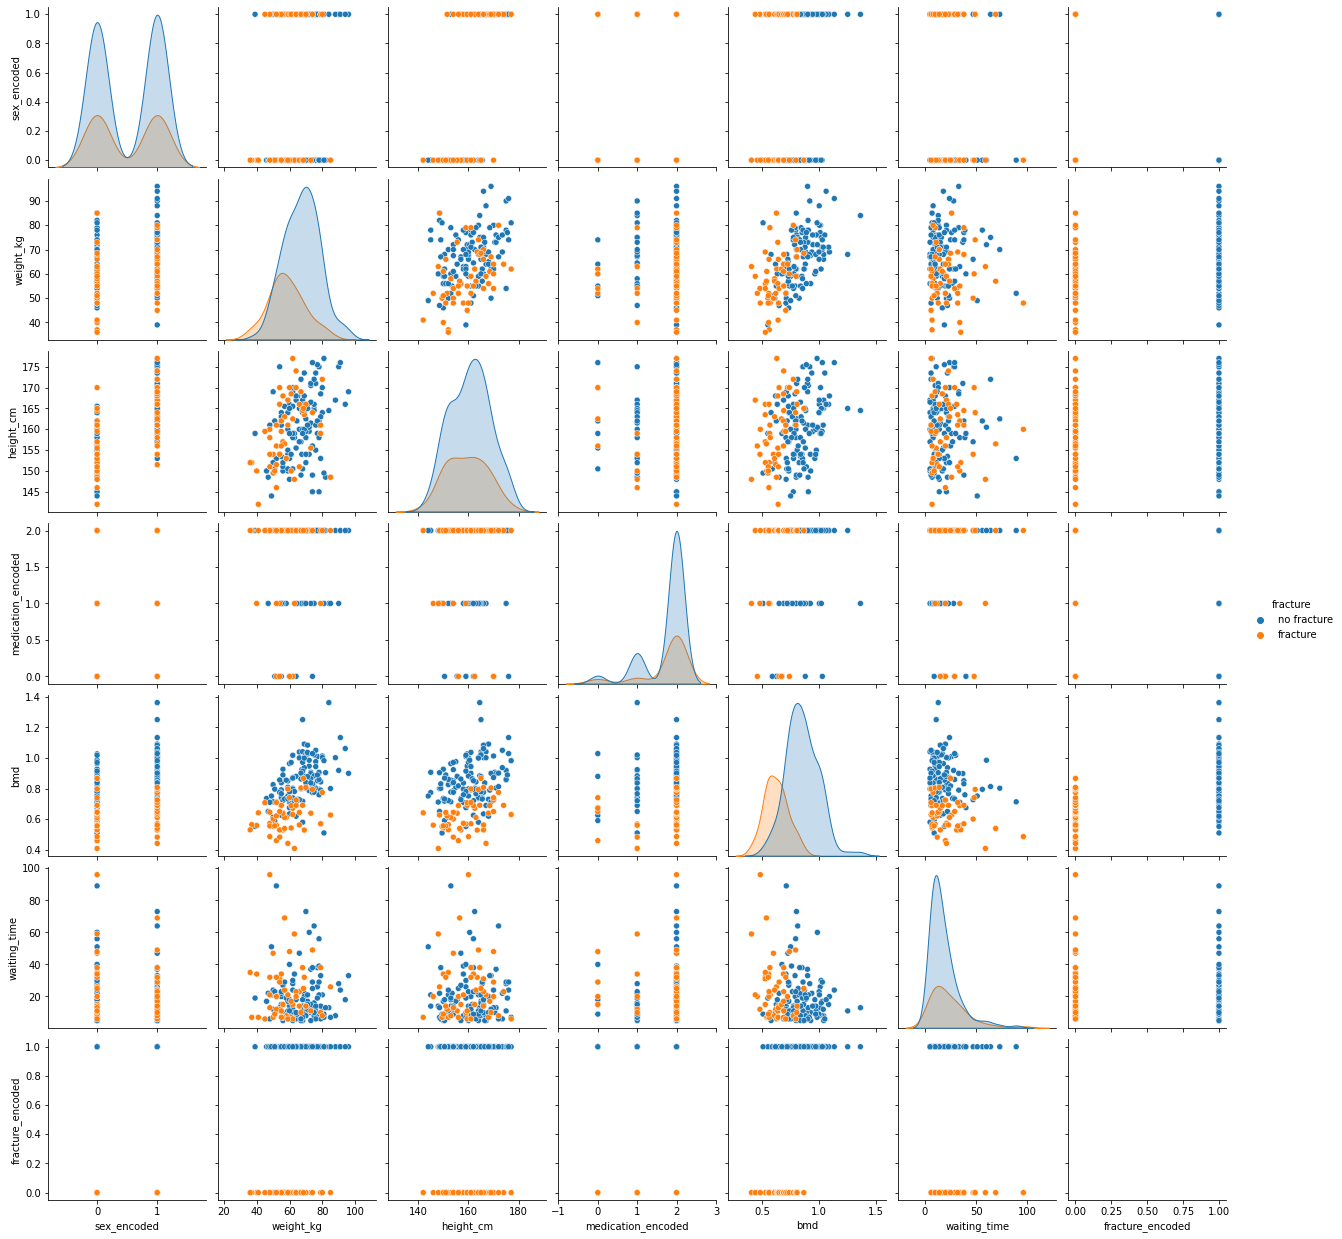

In [115]:
campos = ['sex_encoded', 'weight_kg', 'height_cm', 'medication_encoded', 'bmd', 'waiting_time', 'fracture', 'fracture_encoded']
sns.pairplot(df_bmd[campos], hue='fracture')

<AxesSubplot:>

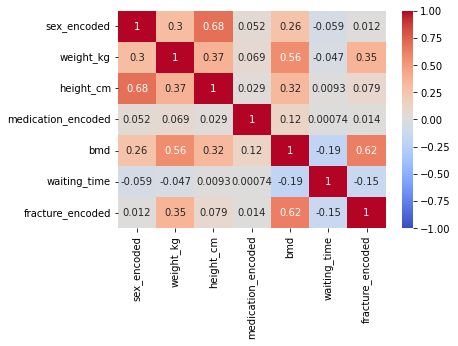

In [88]:
# sns heatmap para ver la correlacion entre las variables
sns.heatmap(df_bmd[campos].corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm')

In [129]:
# campos para entrenar
campos = ['weight_kg', 'bmd']
campo_Y = ['fracture']

X = df_bmd[campos]
y = df_bmd[campo_Y]

# funciones para entrenar el modelo
def entrenar_knn(X, y, k):
    scaler = preprocessing.StandardScaler().fit(X)
    Xtrain = scaler.transform(X)
    Xtest = scaler.transform(X)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    return knn

def best_knn(Xtrain, Xtest, y_train, y_test):
    ks = range(1, 50)
    best_score = 0
    best_k = 0
    best_model = None
    for k in ks:
        knn = entrenar_knn(Xtrain, y_train, k)
        score = metrics.accuracy_score(y_test, knn.predict(Xtest))
        if score > best_score:
            best_score = score
            best_k = k
            best_model = knn
    return best_model, best_k

# datos de entrenamiento y prueba
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42, train_size = 0.7)

knn, k = best_knn(Xtrain, Xtest, y_train.values.ravel(), y_test.values.ravel())
print('k=', k)

y_pred = knn.predict(Xtest)

# mostrar las metricas
print( "Certeza en datos de entrenamiento: ", metrics.accuracy_score(y_train, knn.predict(Xtrain)))
print( "Certeza en datos de test: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

print('Matriz de confusion:\n', metrics.confusion_matrix(y_test, y_pred))

print('\n\n El mejor resultado fue con k =', k, 'y accuaracy de', metrics.accuracy_score(y_test, y_pred))


k= 11
Certeza en datos de entrenamiento:  0.7627118644067796
Certeza en datos de test:  0.8235294117647058
              precision    recall  f1-score   support

    fracture       0.80      0.53      0.64        15
 no fracture       0.83      0.94      0.88        36

    accuracy                           0.82        51
   macro avg       0.81      0.74      0.76        51
weighted avg       0.82      0.82      0.81        51

Matriz de confusion:
 [[ 8  7]
 [ 2 34]]


 El mejor resultado fue con k = 11 y accuaracy de 0.8235294117647058


## 5. K-NN


El Ges existe un dataset llamado bdiag.csv, el mismo cuenta con varios detalles de imágenes de pacientes a los que se les realizó una biopsia para detectar cáncer de mama. La variable diagnosis clasifica el tejido biopsiado como M = maligno o B = benigno.

Use un algoritmo K-NN para predecir el diagnóstico

Construya la matriz de confusión para un K = 5

In [131]:
# leer bdiag.csv
df_bdiag = pd.read_csv('bdiag.csv')
print(df_bdiag.isna().sum())
df_bdiag

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [150]:
# construir el modelo
regresores = df_bdiag.columns.drop(['id','diagnosis'])
X = df_bdiag[regresores]
y = df_bdiag['diagnosis']

# datos de entrenamiento y prueba
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42, train_size = 0.7)

knn, k = best_knn(Xtrain, Xtest, y_train, y_test)
print('k=', k)

y_pred = knn.predict(Xtest)

# mostrar las metricas
print( "Certeza en datos de entrenamiento: ", metrics.accuracy_score(y_train, knn.predict(Xtrain)))
print( "Certeza en datos de test: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))


print('Matriz de confusion:\n', metrics.confusion_matrix(y_test, y_pred))

print('\n\n El mejor resultado fue con k =', k, 'y accuaracy de', metrics.accuracy_score(y_test, y_pred))


k= 12
Certeza en datos de entrenamiento:  0.9246231155778895
Certeza en datos de test:  0.9415204678362573
              precision    recall  f1-score   support

           B       0.92      0.99      0.95       107
           M       0.98      0.86      0.92        64

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

Matriz de confusion:
 [[106   1]
 [  9  55]]


 El mejor resultado fue con k = 12 y accuaracy de 0.9415204678362573


In [152]:
# qué pasa con un k=5?
knn = entrenar_knn(Xtrain, y_train, 5)
y_pred = knn.predict(Xtest)

# mostrar las metricas
print( "Certeza en datos de entrenamiento: ", metrics.accuracy_score(y_train, knn.predict(Xtrain)))
print( "Certeza en datos de test: ", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))


print('Matriz de confusion:\n', metrics.confusion_matrix(y_test, y_pred))


Certeza en datos de entrenamiento:  0.9422110552763819
Certeza en datos de test:  0.9298245614035088
              precision    recall  f1-score   support

           B       0.91      0.99      0.95       107
           M       0.98      0.83      0.90        64

    accuracy                           0.93       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171

Matriz de confusion:
 [[106   1]
 [ 11  53]]


Con k=5 la precisión sobre los datos de entrenamiento fue mejor, pero sobre los datos de pruebas no es mejor que con k=11.